In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys
sys.path.append('')

In [ ]:
from enhanced_experiment import EnhancedTimeSeriesExperiment
from models.arima import Arima
from models.baseline import Baseline
from models.lgbm import LGBM
from models.neuralproph import Neuralprophet
from models.timegpt import TimeGPT

from data.data_retriever import Dataretreiver

In [4]:
# Define models
models = {
    'BASELINE': Baseline(),
    'LGBM': LGBM(),
    'ARIMA': Arima(order=[1,0,1], seasonal_order=[1,1,1,24]),
    'NEURALPROPHET': Neuralprophet(),
    'TimeGPT' : TimeGPT()
}

# Initialize the experiment
experiment = EnhancedTimeSeriesExperiment(
    models=models,
    target_column='price',
    forecast_horizon=192,
    n_splits=3,
    step_size=192 # 8 days are skipped between each forecast.
)
# Define custom combinations of different measurement types with different areas
custom_combinations = [
    {
        'wind': {2,7,8,23,28,29,13,32,37,26,36,13,3},
        'sun': {13,14,18,19,17,22,26,27,32,33,12,28,16}
    },
]

# Experiment 1
No reduction, with custom areas. Additionally, models are trained with no exogenous variables

In [ ]:
data = Dataretreiver(reduce=None, debug=True)
df = data.combined

# Run the experiments with these custom combinations
experiment.run_feature_group_experiments(
    df=df,
    custom_feature_combinations=custom_combinations,
    add_all_columns=True,
    add_base_columns=True,
)

In [ ]:
# Get a table of results
results_df_MAE = experiment.summarize_feature_group_results(metric='MAE')
results_df_MSE = experiment.summarize_feature_group_results(metric='RMSE')
results_df_time = experiment.summarize_feature_group_results(metric='elapsed_time')

print(results_df_MAE)
print(results_df_MSE)
print(results_df_time)

# Plot the results
experiment.plot_feature_group_results(metric='MAE')
experiment.plot_feature_group_results(metric='RMSE')


                    NEURALPROPHET
base_only      205.9427 ± 67.4183
custom_area_0  221.8133 ± 49.5130
all_areas      233.7904 ± 34.4393
                    NEURALPROPHET
base_only        93.9160 ± 5.8736
custom_area_0  122.5044 ± 22.4471
all_areas      217.8542 ± 20.2137


In [ ]:
experiment.save_feature_group_results_to_csv("../results/reduction_fr/experiment_1_results.csv")

# Experiment 2
PCA pure reduction. No custom areas

In [5]:
experiment = EnhancedTimeSeriesExperiment(
    models=models,
    target_column='price',
    forecast_horizon=192,
    n_splits=5,
    step_size=192 # 8 days are skipped between each forecast.
)

In [ ]:
data = Dataretreiver(reduce='pca_pure', debug=True, reduction_num_cols=13)
df = data.combined
data.save_selected_areas_to_csv("../results/reduction_fr/pca_pure_areas.csv")


# Run the experiments with these custom combinations
experiment.run_feature_group_experiments(
    df=df,
    add_all_columns=True,
    add_base_columns=False
)

In [7]:
# Get a table of results
results_df_MAE = experiment.summarize_feature_group_results(metric='MAE')
results_df_MSE = experiment.summarize_feature_group_results(metric='RMSE')
results_df_time = experiment.summarize_feature_group_results(metric='elapsed_time')

print(results_df_MAE)
print(results_df_MSE)
print(results_df_time)

# Plot the results
experiment.plot_feature_group_results(metric='MAE')
experiment.plot_feature_group_results(metric='RMSE')


                     BASELINE                LGBM               ARIMA  \
all_areas  200.2838 ± 61.1400  159.1760 ± 25.1511  162.3220 ± 35.6349   

                NEURALPROPHET              TimeGPT  
all_areas  244.1810 ± 67.9805  339.7902 ± 151.9247  
                     BASELINE                LGBM               ARIMA  \
all_areas  262.0008 ± 83.8358  205.0885 ± 39.1087  204.4106 ± 40.8489   

                NEURALPROPHET              TimeGPT  
all_areas  297.0044 ± 79.5193  409.2508 ± 143.5163  
                  BASELINE              LGBM               ARIMA  \
all_areas  0.0306 ± 0.0045  85.6244 ± 2.4454  553.2826 ± 13.0885   

               NEURALPROPHET           TimeGPT  
all_areas  114.1423 ± 7.2315  13.0170 ± 4.8486  


In [8]:
experiment.save_feature_group_results_to_csv("../results/reduction_fr/pca_pure_results.csv")

Saved feature group results to ../results/reduction_fr/pca_pure_results_20250516_115926.csv


# Experiment 3
PCA KMeans reduction. No custom areas

In [9]:
experiment = EnhancedTimeSeriesExperiment(
    models=models,
    target_column='price',
    forecast_horizon=192,
    n_splits=5,
    step_size=192 # 8 days are skipped between each forecast.
)

In [ ]:
data = Dataretreiver(reduce='pca_kmeans', debug=True, reduction_num_cols=13)
df = data.combined
data.save_selected_areas_to_csv("../results/reduction_fr/pca_kmeans_areas.csv")

# Run the experiments with these custom combinations
experiment.run_feature_group_experiments(
    df=df,
    add_all_columns=True,
    add_base_columns=False
)

                         LGBM
all_areas  167.5270 ± 33.3843
                         LGBM
all_areas  214.4107 ± 41.8872


Plotting SHAP summary plot for LGBM


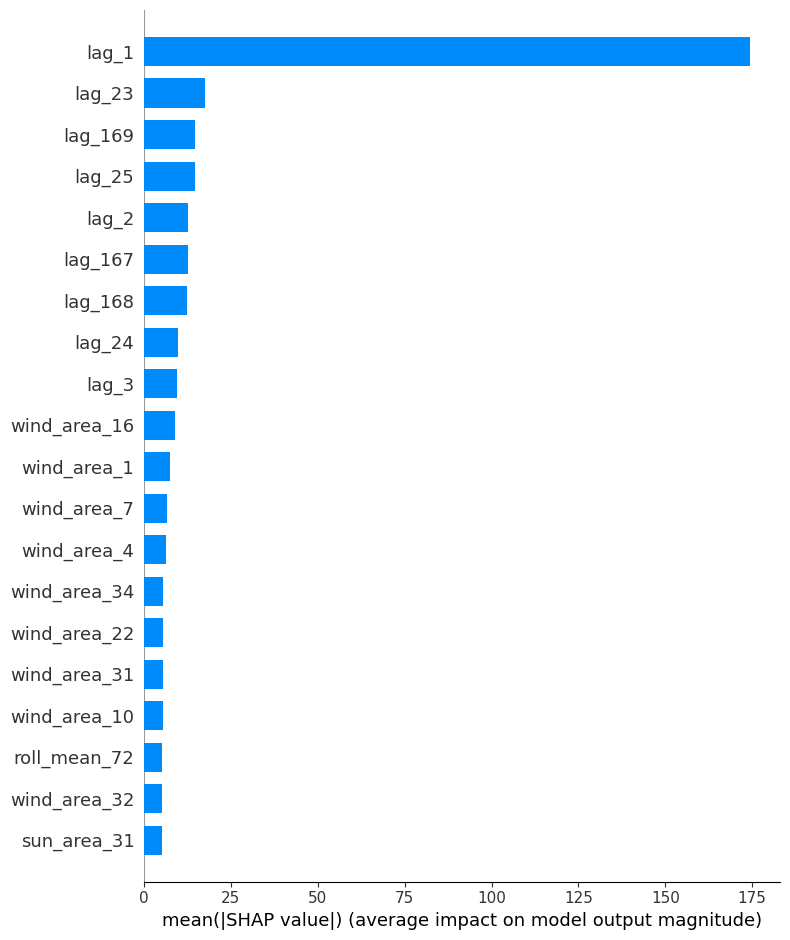

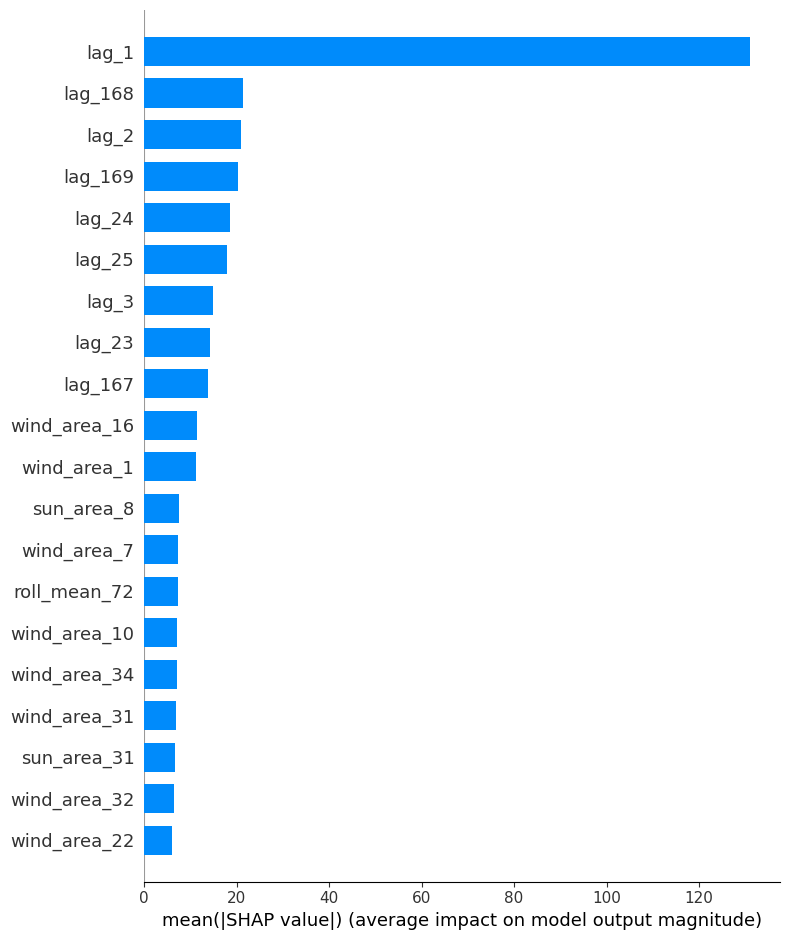

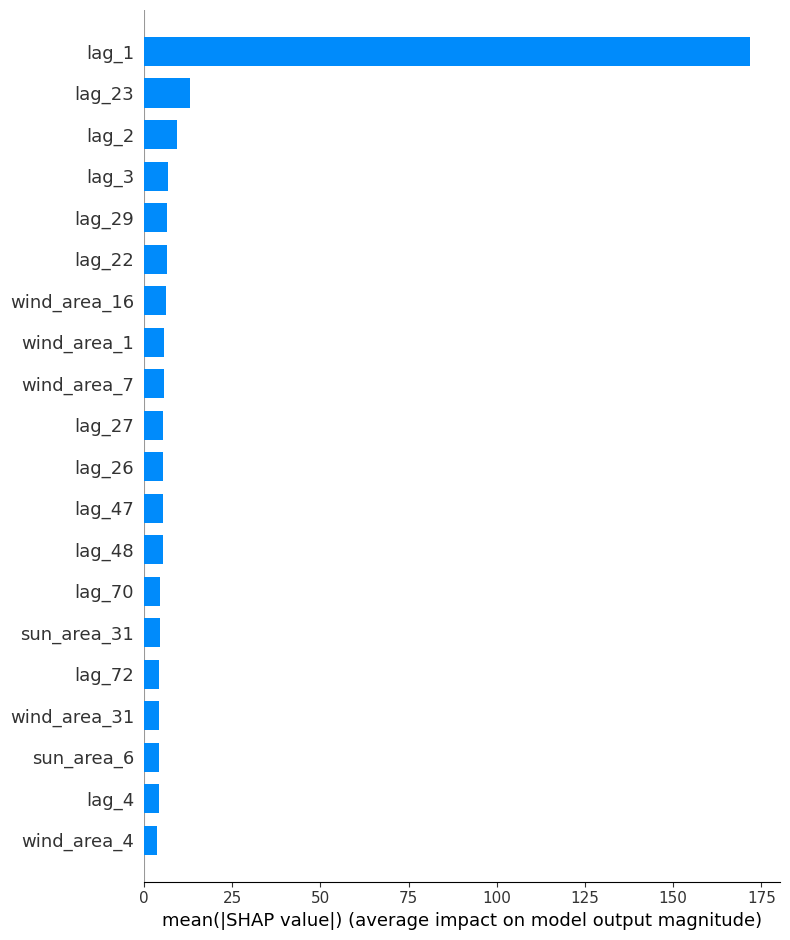

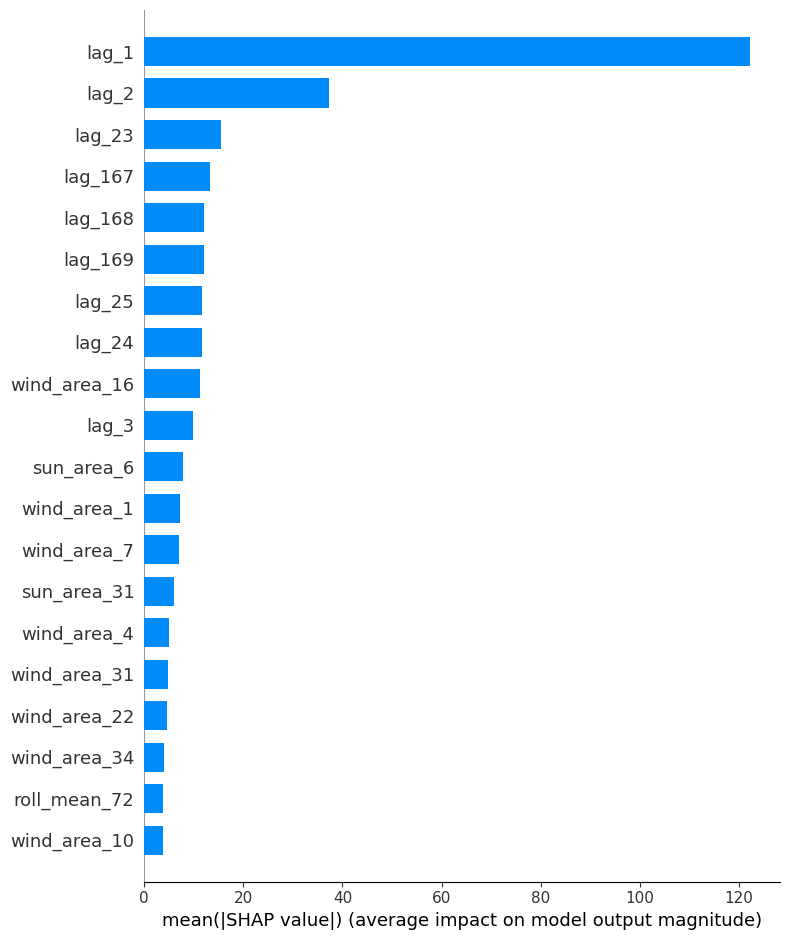

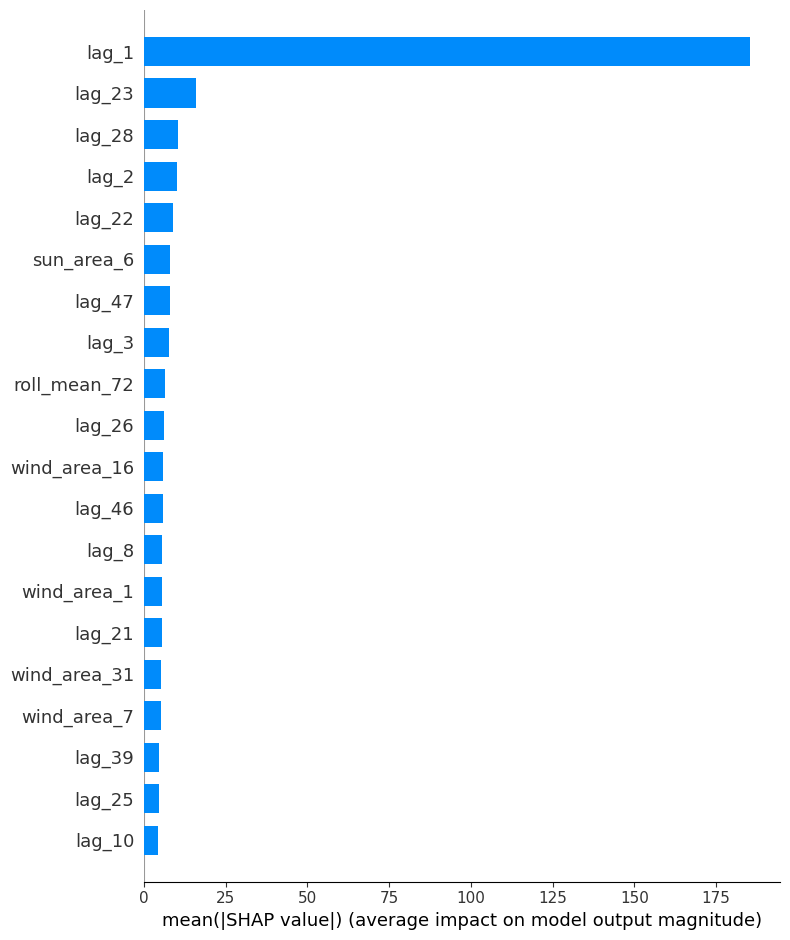

In [ ]:
# Get a table of results
results_df_MAE = experiment.summarize_feature_group_results(metric='MAE')
results_df_MSE = experiment.summarize_feature_group_results(metric='RMSE')
results_df_time = experiment.summarize_feature_group_results(metric='elapsed_time')

print(results_df_MAE)
print(results_df_MSE)
print(results_df_time)

# Plot the results
experiment.plot_feature_group_results(metric='MAE')
experiment.plot_feature_group_results(metric='RMSE')
experiment.plot_feature_group_results(metric='SHAP_values')

In [ ]:
# Plot predictions for the 'sun_areas_1_2_3' feature group
experiment.plot_feature_group_predictions(
    df=df,
    feature_group='all_areas',
    fold_index=0  # First CV fold
)

In [ ]:
experiment.save_feature_group_results_to_csv("../results/reduction_fr/pca_kmeans_results.csv")

Saved feature group results to ../results/reduction_notemp/experiment_3_results_20250506_142027.csv


# Experiment 4
Pearson reduction

In [ ]:
experiment = EnhancedTimeSeriesExperiment(
    models=models,
    target_column='price',
    forecast_horizon=192,
    n_splits=5,
    step_size=192 # 8 days are skipped between each forecast.
)

In [ ]:
data = Dataretreiver(reduce='pearson', debug=True, reduction_num_cols=13)
df = data.combined
data.save_selected_areas_to_csv("../results/reduction_fr/pearson_areas.csv")


# Run the experiments with these custom combinations
experiment.run_feature_group_experiments(
    df=df,
    add_all_columns=True,
    add_base_columns=False
)

In [ ]:
# Get a table of results
results_df_MAE = experiment.summarize_feature_group_results(metric='MAE')
results_df_MSE = experiment.summarize_feature_group_results(metric='RMSE')
results_df_time = experiment.summarize_feature_group_results(metric='elapsed_time')

print(results_df_MAE)
print(results_df_MSE)
print(results_df_time)

# Plot the results
experiment.plot_feature_group_results(metric='MAE')
experiment.plot_feature_group_results(metric='RMSE')


                      BASELINE                LGBM               ARIMA  \
all_areas  259.3271 ± 126.1766  177.4736 ± 31.3329  159.9787 ± 40.5705   

                 NEURALPROPHET  
all_areas  254.2341 ± 179.7522  
                      BASELINE                LGBM               ARIMA  \
all_areas  320.7175 ± 138.3372  224.2323 ± 39.4980  200.3210 ± 47.5422   

                 NEURALPROPHET  
all_areas  254.2341 ± 179.7522  


In [ ]:
experiment.save_feature_group_results_to_csv("../results/reduction_fr/pearson_results.csv")

Saved feature group results to ../results/reduction_notemp/experiment_4_results_20250506_144248.csv


In [ ]:
# Plot predictions for the 'sun_areas_1_2_3' feature group
experiment.plot_feature_group_predictions(
    df=df,
    feature_group='all_areas',
    fold_index=0  # First CV fold
)